In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ndcg_score
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [10]:
test_data = pd.read_csv("test_df.csv")
test_data.head()

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,10655,9,0,0,1,20,4,40,0,0,...,0.148830,0.196644,0.029267,0,0,0,0.03674,0.0,0.0,0
1,10655,9,0,0,1,20,4,40,0,0,...,0.119724,0.174199,0.020856,0,0,0,0.00000,0.0,0.0,0
2,10655,9,0,0,1,20,4,40,0,0,...,0.160606,0.198780,0.031925,0,0,0,0.00000,0.0,0.0,0
3,10655,9,0,0,1,20,4,40,0,0,...,0.180191,0.187882,0.033855,0,0,0,0.00000,0.0,0.0,0
4,10655,9,0,0,1,20,4,40,0,0,...,0.117308,0.153586,0.018017,0,0,0,0.00000,0.0,0.0,0


<Axes: title={'center': 'Таргет'}, xlabel='target', ylabel='count'>

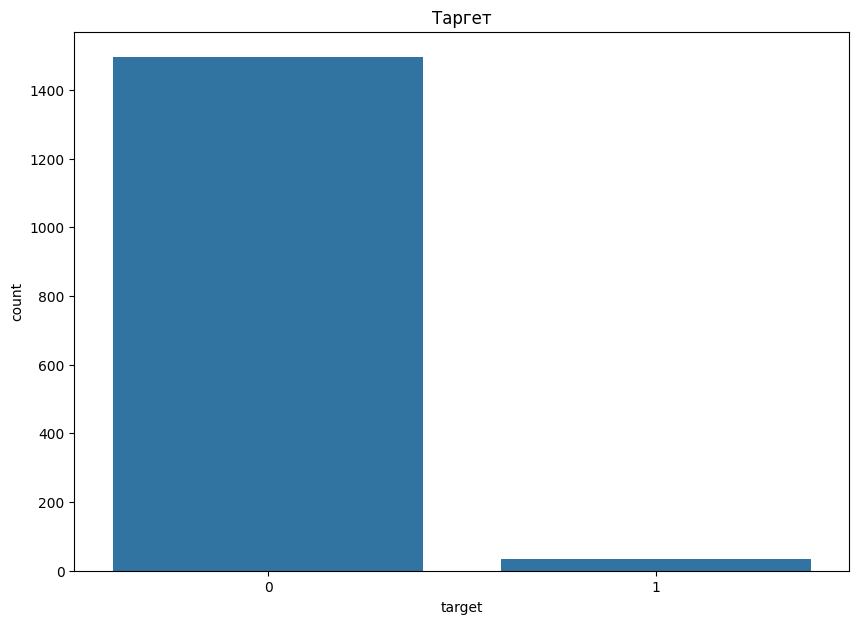

In [142]:
plt.figure(figsize=(10, 7))
plt.title("Таргет")
sns.countplot(x = test_data['target'])

In [11]:
train_data = pd.read_csv("train_df.csv")
train_data

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,758,9,0,0,1,20,3,40,0,3,...,0.204682,0.271755,0.055623,0,0,0,0.38648,0.0,0.0,0
1,758,9,0,0,1,20,3,40,0,3,...,0.195531,0.188787,0.036914,0,0,0,0.10982,0.0,0.0,0
2,758,9,0,0,1,20,3,40,0,3,...,0.148609,0.186517,0.027718,0,0,0,0.03674,0.0,0.0,0
3,758,9,0,0,1,20,3,40,0,3,...,0.223748,0.229039,0.051247,0,0,0,0.00000,0.0,0.0,0
4,758,9,0,0,1,20,3,40,0,3,...,0.170935,0.249031,0.042568,0,0,0,0.00000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,494693,9,0,0,0,9,4,38,6,6,...,0.309672,0.921060,0.285226,0,0,0,0.98807,0.0,0.0,0
15077,494693,9,0,0,0,9,4,38,6,6,...,0.303805,0.995086,0.302312,0,0,0,0.87146,0.0,0.0,0
15078,494693,9,0,0,0,9,4,38,6,6,...,0.346538,0.993070,0.344137,0,0,0,0.49999,0.0,0.0,0
15079,494693,9,0,0,0,9,4,38,6,6,...,0.243154,0.994833,0.241898,0,0,0,0.67614,0.0,0.0,0


Text(0.5, 1.0, 'Features Correlation')

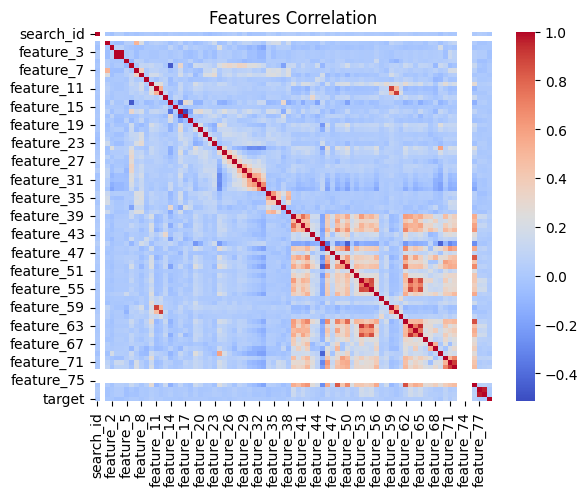

In [144]:
df_corr=train_data.corr()
sns.heatmap(df_corr,cmap='coolwarm')
plt.title('Features Correlation')

Text(0.5, 1.0, 'Features Correlation')

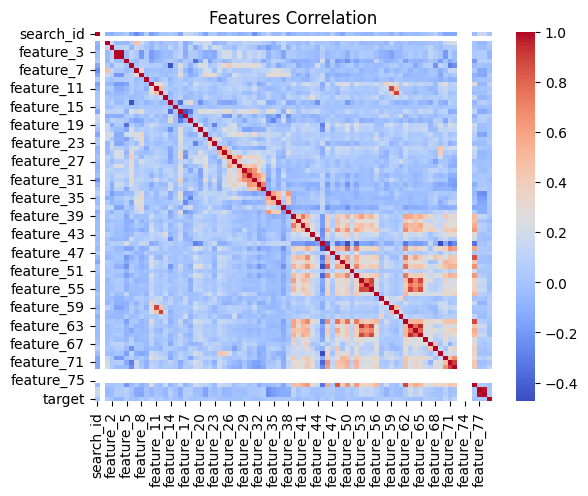

In [145]:
df_corr=test_data.corr()
sns.heatmap(df_corr,cmap='coolwarm')
plt.title('Features Correlation')

In [159]:
def train_test (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)[:, 1]
    result_score = ndcg_score(y_test.values.reshape(1, -1), predictions.reshape(1, -1))
    print("NDCG_SCORE = ", result_score)
    return result_score

In [12]:
y_train = train_data['target']
X_train = train_data.drop(columns =['target'])

y_test = test_data['target']
X_test = test_data.drop(columns =['target'])

In [177]:
model = LogisticRegression()
score = train_test(model, X_train, y_train, X_test, y_test)

NDCG_SCORE =  0.41291761830445706


In [150]:
model = SVC(C = 1, kernel = 'rbf', gamma = 0.01, probability = True)
score = train_test(model, X_train, y_train, X_test, y_test)

NDCG_SCORE =  0.3853162799788544


In [151]:
model = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 8, n_estimators = 11)
score = train_test(model, X_train, y_train, X_test, y_test)

NDCG_SCORE =  0.5525896875378007


In [152]:
model = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 5, min_samples_split = 2)
score = train_test(model, X_train, y_train, X_test, y_test)

NDCG_SCORE =  0.534446128906394


In [153]:
base_model = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 7, min_samples_split = 2)
model = BaggingClassifier(estimator=base_model, max_features = 0.7, max_samples = 0.7, n_estimators = 70)
score = train_test(model, X_train, y_train, X_test, y_test)

NDCG_SCORE =  0.5344319037155871


In [154]:
base_model = SVC(C = 1, gamma = 0.01, kernel = 'rbf')
model = BaggingClassifier(estimator=base_model)
score = train_test(model, X_train, y_train, X_test, y_test)

NDCG_SCORE =  0.3899032693596343


In [155]:
model = XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 20, gamma = 0, min_child_weight = 3)
score = train_test(model, X_train, y_train, X_test, y_test)

NDCG_SCORE =  0.6211051982000415


CatBoost показал хорошее качество, поэтому я решил поподбирать гиперпараметры. К сожалению, кодирование категориальных признаков OneHot Encodingом и убирание константных признаков, не только не дали прироста к моей метрике
А наоборот уменьшили ее значение достаточно сильно. Поэтому я просто убрал эти куски кода. Не надо их запускать. Они поломают код дальше.
В связи с этим мне осталось только перебирать гиперпараметры и использовать Pool для того, чтобы можно было работать с запросами

In [6]:
train_data.drop_duplicates(inplace=True)
train_data.dropna(subset=['target'], inplace=True)
train_data.fillna(np.median, inplace=True)
train_data

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,758,9,0,0,1,20,3,40,0,3,...,0.204682,0.271755,0.055623,0,0,0,0.38648,0.0,0.0,0
1,758,9,0,0,1,20,3,40,0,3,...,0.195531,0.188787,0.036914,0,0,0,0.10982,0.0,0.0,0
2,758,9,0,0,1,20,3,40,0,3,...,0.148609,0.186517,0.027718,0,0,0,0.03674,0.0,0.0,0
3,758,9,0,0,1,20,3,40,0,3,...,0.223748,0.229039,0.051247,0,0,0,0.00000,0.0,0.0,0
4,758,9,0,0,1,20,3,40,0,3,...,0.170935,0.249031,0.042568,0,0,0,0.00000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,494693,9,0,0,0,9,4,38,6,6,...,0.309672,0.921060,0.285226,0,0,0,0.98807,0.0,0.0,0
15077,494693,9,0,0,0,9,4,38,6,6,...,0.303805,0.995086,0.302312,0,0,0,0.87146,0.0,0.0,0
15078,494693,9,0,0,0,9,4,38,6,6,...,0.346538,0.993070,0.344137,0,0,0,0.49999,0.0,0.0,0
15079,494693,9,0,0,0,9,4,38,6,6,...,0.243154,0.994833,0.241898,0,0,0,0.67614,0.0,0.0,0


In [7]:
test_data.drop_duplicates(inplace=True)
test_data.dropna(subset=['target'], inplace=True)
test_data.fillna(np.median, inplace=True)
test_data

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,10655,9,0,0,1,20,4,40,0,0,...,0.148830,0.196644,0.029267,0,0,0,0.03674,0.0,0.0,0
1,10655,9,0,0,1,20,4,40,0,0,...,0.119724,0.174199,0.020856,0,0,0,0.00000,0.0,0.0,0
2,10655,9,0,0,1,20,4,40,0,0,...,0.160606,0.198780,0.031925,0,0,0,0.00000,0.0,0.0,0
3,10655,9,0,0,1,20,4,40,0,0,...,0.180191,0.187882,0.033855,0,0,0,0.00000,0.0,0.0,0
4,10655,9,0,0,1,20,4,40,0,0,...,0.117308,0.153586,0.018017,0,0,0,0.00000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,493078,9,0,0,0,9,4,35,0,0,...,0.341683,0.067348,0.023012,0,0,0,0.46108,0.0,0.0,0
1525,493078,9,0,0,0,9,4,35,0,0,...,0.270293,0.049000,0.013244,0,0,0,0.03674,0.0,0.0,0
1526,493078,9,0,0,0,9,4,35,0,0,...,0.372268,0.069882,0.026015,0,0,0,0.14540,0.0,0.0,1
1527,493078,9,0,0,0,9,4,35,0,0,...,0.355755,0.077469,0.027560,0,0,0,0.21288,0.0,0.0,1


In [13]:
cat_train = [i for i in X_train.columns if 1 < X_train[i].nunique() <= 10]
cat_test = [i for i in X_test.columns if 1 < X_test[i].nunique() <= 10]

print(cat_train)
print(cat_test)

['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_61']
['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_23', 'feature_61']


In [14]:
cat_test.pop(14)
print(cat_test)

['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_61']


In [256]:
model.get_feature_importance(prettified=True) #После запуска кода ниже посмотрел важность

,Feature Id,Importances
0,feature_70,10.659855
1,feature_51,6.065539
2,feature_66,4.120076
3,feature_38,3.321216
4,feature_29,3.029641
...,...,...
75,feature_14,0.000000
76,feature_25,0.000000
77,feature_73,0.000000
78,feature_74,0.000000


Также попробовал посмотреть model.get_feature_importance(prettified=True). Откинуть признаки, у которых importance 0. Однако это сильно ухудшило метрику, поэтому пришлось вернуть. Видимо 
Catboost не любит, когда с датой что-то делают.

In [280]:
train_id = X_train['search_id']
test_id = X_test['search_id']

train_Pool = Pool(data=X_train, label=y_train, group_id=train_id)
test_Pool = Pool(data=X_test, label=y_test, group_id=test_id)

model = CatBoostClassifier(n_estimators = 80, depth=6, random_strength=1.01, scale_pos_weight=0.78, custom_metric='NDCG', boosting_type = 'Plain', verbose = 10, objective = 'Logloss')
model.fit(train_Pool, eval_set=test_Pool)
predictions = model.predict_proba(X_test)[:, 1]
score = ndcg_score(y_test.values.reshape(1, -1), predictions.reshape(1, -1), k=X_test.shape[0])
print(score)


Learning rate set to 0.185839
0:	learn: 0.3943769	test: 0.3937220	best: 0.3937220 (0)	total: 10.4ms	remaining: 821ms
10:	learn: 0.0799791	test: 0.0829519	best: 0.0829519 (10)	total: 113ms	remaining: 707ms
20:	learn: 0.0729769	test: 0.0789929	best: 0.0789929 (20)	total: 209ms	remaining: 588ms
30:	learn: 0.0691140	test: 0.0773256	best: 0.0773256 (30)	total: 304ms	remaining: 480ms
40:	learn: 0.0644485	test: 0.0770697	best: 0.0769651 (37)	total: 389ms	remaining: 370ms
50:	learn: 0.0620689	test: 0.0777049	best: 0.0769533 (41)	total: 475ms	remaining: 270ms
60:	learn: 0.0599921	test: 0.0775223	best: 0.0769533 (41)	total: 561ms	remaining: 175ms
70:	learn: 0.0576324	test: 0.0775540	best: 0.0769533 (41)	total: 658ms	remaining: 83.4ms
79:	learn: 0.0557840	test: 0.0776458	best: 0.0769533 (41)	total: 734ms	remaining: 0us

bestTest = 0.07695333847
bestIteration = 41

Shrink model to first 42 iterations.
0.7157127140678244


Вроде бы значение метрики получилось неплохое 0.715, однако я рассчитывал, что буду работать с категориальными признаками, так как это удобно в CatBoost (одна из причин, почему я взял именно его. кроме хорошего скора на raw данных), но с ними получается в разы хуже.
Возможно, XGBClassifier мог дать точность больше, но он тоже уменьшал скор при обработке данных. Возможно, я делал что-то не так, но все же. 